In [ ]:
# Run with 'solar': conda
from tsai.all import *

Dataset: Sunspots
downloading data...
...data downloaded. Path = data\forecasting\Sunspots.csv


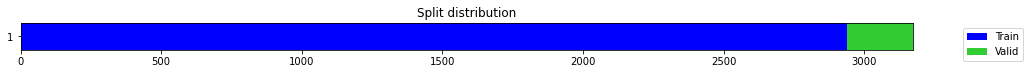

epoch,train_loss,valid_loss,mae,time
0,11447.300781,8768.371094,73.142723,00:13
1,11518.161133,8696.651367,72.717300,00:13
2,11487.028320,8574.531250,72.038406,00:13
3,11308.079102,8334.628906,70.794441,00:14
4,11079.072266,7774.720215,68.079948,00:12
5,10720.352539,6244.893066,60.900883,00:14
6,10232.719727,3953.753662,50.185703,00:14
7,9629.113281,2783.258545,43.062580,00:12
8,8945.659180,2385.737061,39.485825,00:15
9,8219.574219,1600.069458,30.391714,00:14


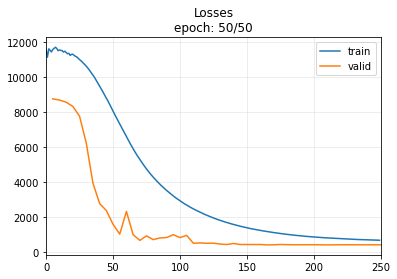

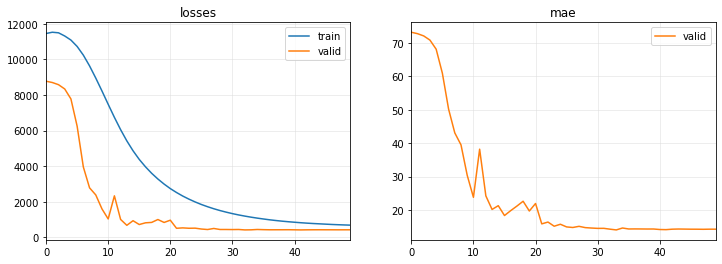

In [48]:
ts = get_forecasting_time_series("Sunspots").values
X, y = SlidingWindow(60, horizon=1)(ts)
splits = TimeSplitter(235)(y) 
batch_tfms = TSStandardize()
fcst = TSForecaster(X, y, splits=splits, batch_tfms=batch_tfms, bs=512, arch=TST, metrics=mae, cbs=ShowGraph())
fcst.fit_one_cycle(50, 1e-3)